#   LAB 04 - Data Mining

## Introduction to Python

Full Intro: https://dbdmg.polito.it/dbdmg_web/wp-content/uploads/2024/03/1-Python-Programming.pdf

In [ ]:
# Object Oriented Programming
obj.method(arg1, arg2, ecc...)

# Data type
int, str, float, None, list, set

# Import libraries
import library_name
from library_name import class

# loops
for el in list_name:
    # do something

# condition
if condition_name:
    # do something
else:
    # do something

# print
print('string', string)

## Introduction to Python Libraries

### Pandas

Documentation: https://pandas.pydata.org/docs/

In [1]:
import pandas as pd
filename = 'breast.xlsx'

Read data

In [3]:
dataframe=pd.read_excel(filename) # read_csv(), read_excel(), read_txt()

Select Features

In [4]:


# see columns
columns=dataframe.columns

columns

Index(['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig',
       'breast', 'breast-quad', 'irradiat', 'Class'],
      dtype='object')

In [32]:
dataframe.dtypes

age            int32
menopause      int32
tumor-size     int32
inv-nodes      int32
node-caps      int32
deg-malig      int32
breast         int32
breast-quad    int32
irradiat       int32
Class          int32
dtype: object

In [5]:
dataframe.head() # show the first 5 rows

age  menopause tumor-size inv-nodes node-caps deg-malig   breast   
0  '40-49'  'premeno'    '15-19'     '0-2'     'yes'       '3'  'right'  \
1  '50-59'     'ge40'    '15-19'     '0-2'      'no'       '1'  'right'   
2  '50-59'     'ge40'    '35-39'     '0-2'      'no'       '2'   'left'   
3  '40-49'  'premeno'    '35-39'     '0-2'     'yes'       '3'  'right'   
4  '40-49'  'premeno'    '30-34'     '3-5'     'yes'       '2'   'left'   

  breast-quad irradiat                   Class  
0   'left_up'     'no'     'recurrence-events'  
1   'central'     'no'  'no-recurrence-events'  
2  'left_low'     'no'     'recurrence-events'  
3  'left_low'    'yes'  'no-recurrence-events'  
4  'right_up'     'no'     'recurrence-events'

In [6]:
dataframe.tail() # show the last 5 rows

age  menopause tumor-size inv-nodes node-caps deg-malig   breast   
281  '50-59'     'ge40'    '30-34'     '6-8'     'yes'       '2'   'left'  \
282  '50-59'  'premeno'    '25-29'     '3-5'     'yes'       '2'   'left'   
283  '30-39'  'premeno'    '30-34'     '6-8'     'yes'       '2'  'right'   
284  '50-59'  'premeno'    '15-19'     '0-2'      'no'       '2'  'right'   
285  '50-59'     'ge40'    '40-44'     '0-2'      'no'       '3'   'left'   

    breast-quad irradiat                   Class  
281  'left_low'     'no'  'no-recurrence-events'  
282  'left_low'    'yes'  'no-recurrence-events'  
283  'right_up'     'no'  'no-recurrence-events'  
284  'left_low'     'no'  'no-recurrence-events'  
285  'right_up'     'no'  'no-recurrence-events'

### Matplotlib

Documentation: https://matplotlib.org/stable/index.html

In [8]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


Create Plot

### Scikit-Learn

Documentation: https://scikit-learn.org/1.5/user_guide.html

In [9]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

Encoding

In [10]:
# Preprocessing: Encode categorical variables
label_encoders = {}
for column in dataframe.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    dataframe[column] = le.fit_transform(dataframe[column])
    label_encoders[column] = le

In [11]:
print(dataframe.dtypes)


age            int32
menopause      int32
tumor-size     int32
inv-nodes      int32
node-caps      int32
deg-malig      int32
breast         int32
breast-quad    int32
irradiat       int32
Class          int32
dtype: object


In [12]:
X = dataframe.iloc[:, :-1]  # All columns except the last
y = dataframe.iloc[:, -1]   # Class column (last column)

In [13]:
X.dtypes

age            int32
menopause      int32
tumor-size     int32
inv-nodes      int32
node-caps      int32
deg-malig      int32
breast         int32
breast-quad    int32
irradiat       int32
dtype: object

In [14]:
y.dtypes

dtype('int32')

Classifier

In [15]:
# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [16]:
# Identify the most discriminative attribute
feature_importances = clf.feature_importances_
most_discriminative = X.columns[feature_importances.argmax()]
print(f"Most discriminative attribute: {most_discriminative}")

Most discriminative attribute: tumor-size


In [17]:
# Determine the height of the tree
tree_height = clf.get_depth()
print(f"Height of the Decision Tree: {tree_height}")

Height of the Decision Tree: 5


In [18]:
# Find a pure partition
tree_rules = export_text(clf, feature_names=list(X.columns))
print(tree_rules)

|--- inv-nodes <= 0.50
|   |--- tumor-size <= 2.50
|   |   |--- menopause <= 1.50
|   |   |   |--- class: 0
|   |   |--- menopause >  1.50
|   |   |   |--- node-caps <= 0.50
|   |   |   |   |--- tumor-size <= 1.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- tumor-size >  1.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- node-caps >  0.50
|   |   |   |   |--- class: 1
|   |--- tumor-size >  2.50
|   |   |--- irradiat <= 0.50
|   |   |   |--- node-caps <= 1.50
|   |   |   |   |--- breast-quad <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- breast-quad >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- node-caps >  1.50
|   |   |   |   |--- class: 1
|   |   |--- irradiat >  0.50
|   |   |   |--- age <= 3.50
|   |   |   |   |--- node-caps <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- node-caps >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- age >  3.50
|   |   |   |   |--- class: 1
|--- inv-nodes >  0.50
|   |--- breast <=

In [19]:
from sklearn import tree

# Visualize the tree
plt.figure(figsize=(200, 100))
tree.plot_tree(
    clf,
    feature_names=X.columns,
    class_names=[str(c) for c in clf.classes_],  # Converte le classi in stringhe
    filled=True
)
plt.show()

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

predictions = clf.predict(X_test)

In [26]:
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.74      0.88      0.80        40
           1       0.55      0.33      0.41        18

    accuracy                           0.71        58
   macro avg       0.65      0.60      0.61        58
weighted avg       0.68      0.71      0.68        58

0.7068965517241379


In [ ]:
#Function used to show the impact of different hyperparameters on the tree
def train_and_plot(max_depth=None, min_samples_leaf=1, min_impurity_decrease=0.0, criterion='gini'):
    clf = DecisionTreeClassifier(
        criterion=criterion,
        max_depth=max_depth,
        min_samples_leaf=min_samples_leaf,
        min_impurity_decrease=min_impurity_decrease,
        random_state=42
    )
    clf.fit(X_train, y_train)
    
    # Plot the tree
    plt.figure(figsize=(200, 100))
    tree.plot_tree(clf, feature_names=X.columns, class_names=clf.classes_.astype(str), filled=True)
    plt.title(f"Depth: {max_depth}, Min Samples Leaf: {min_samples_leaf}, Impurity Decrease: {min_impurity_decrease}, Criterion: {criterion}")
    plt.show()


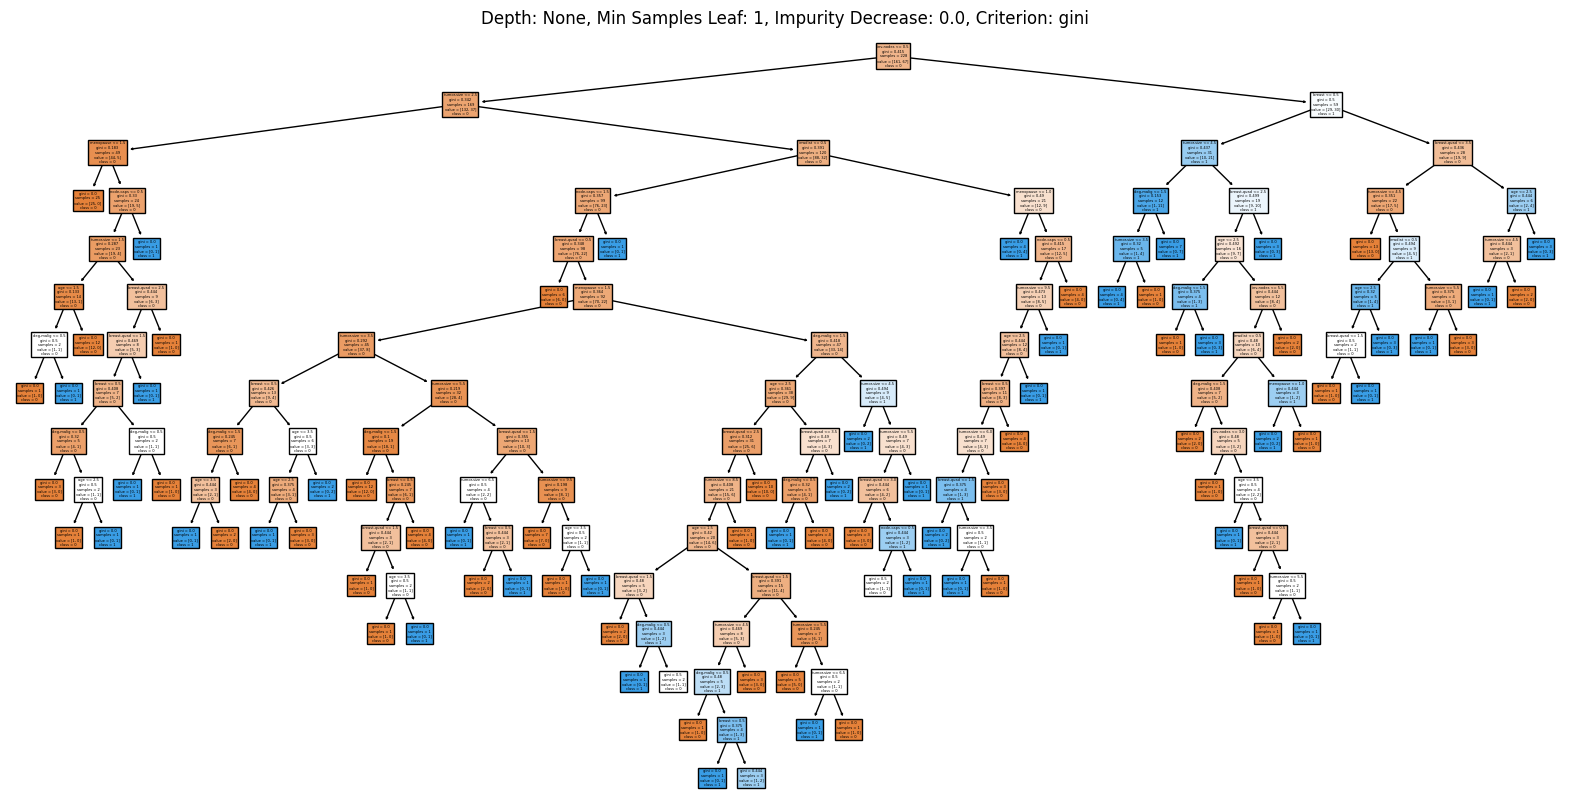

In [64]:
# Default configuration
train_and_plot()

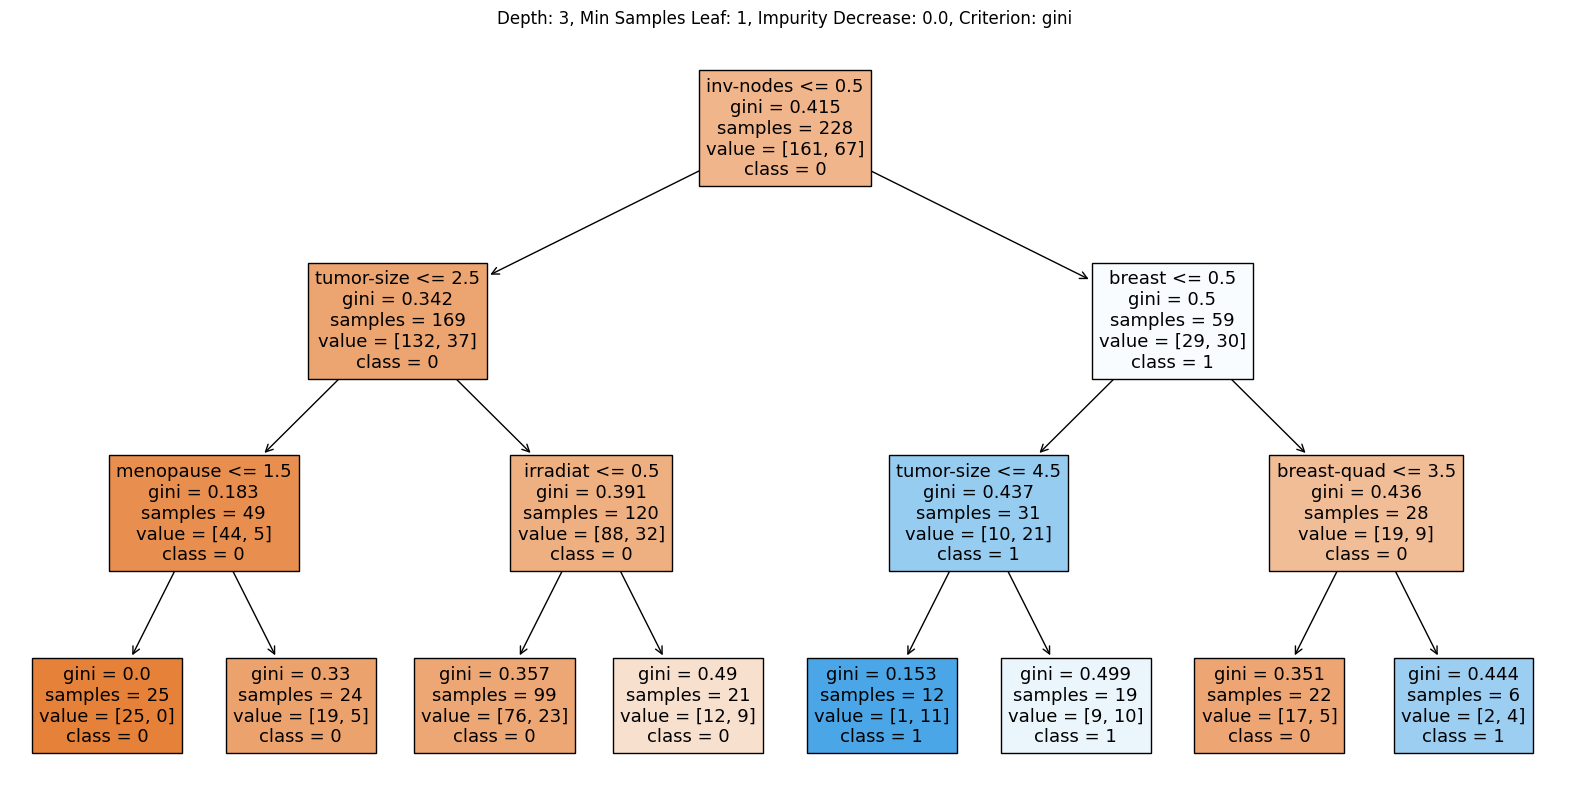

In [65]:
# Configuration 1: Limited depth
train_and_plot(max_depth=3)

In [ ]:
# Configuration 3: Higher minimal impurity decrease
train_and_plot(min_impurity_decrease=0.01)

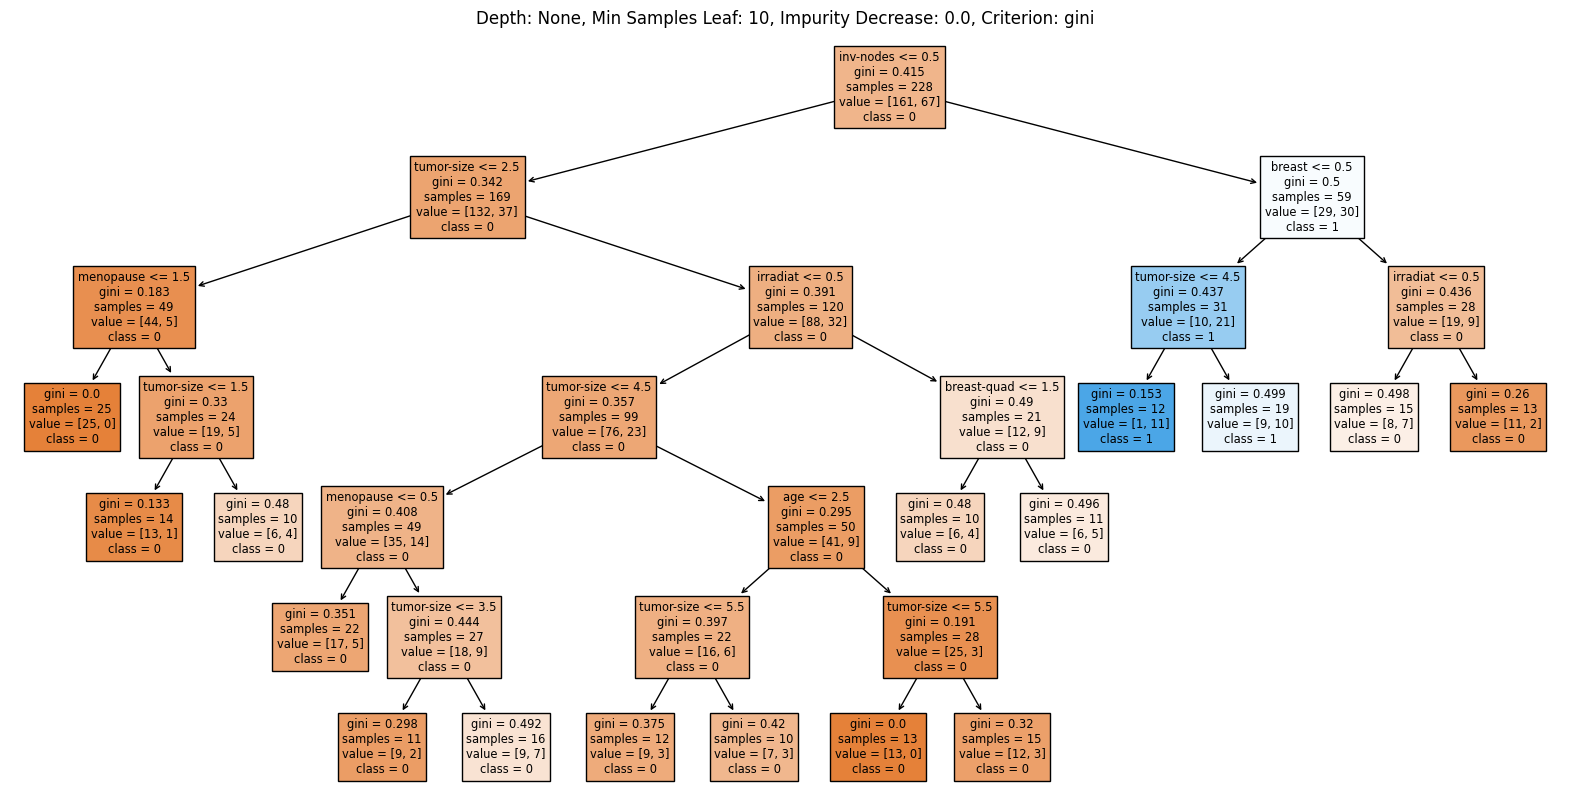

In [66]:
# Configuration 2: Minimum samples per leaf
train_and_plot(min_samples_leaf=10)

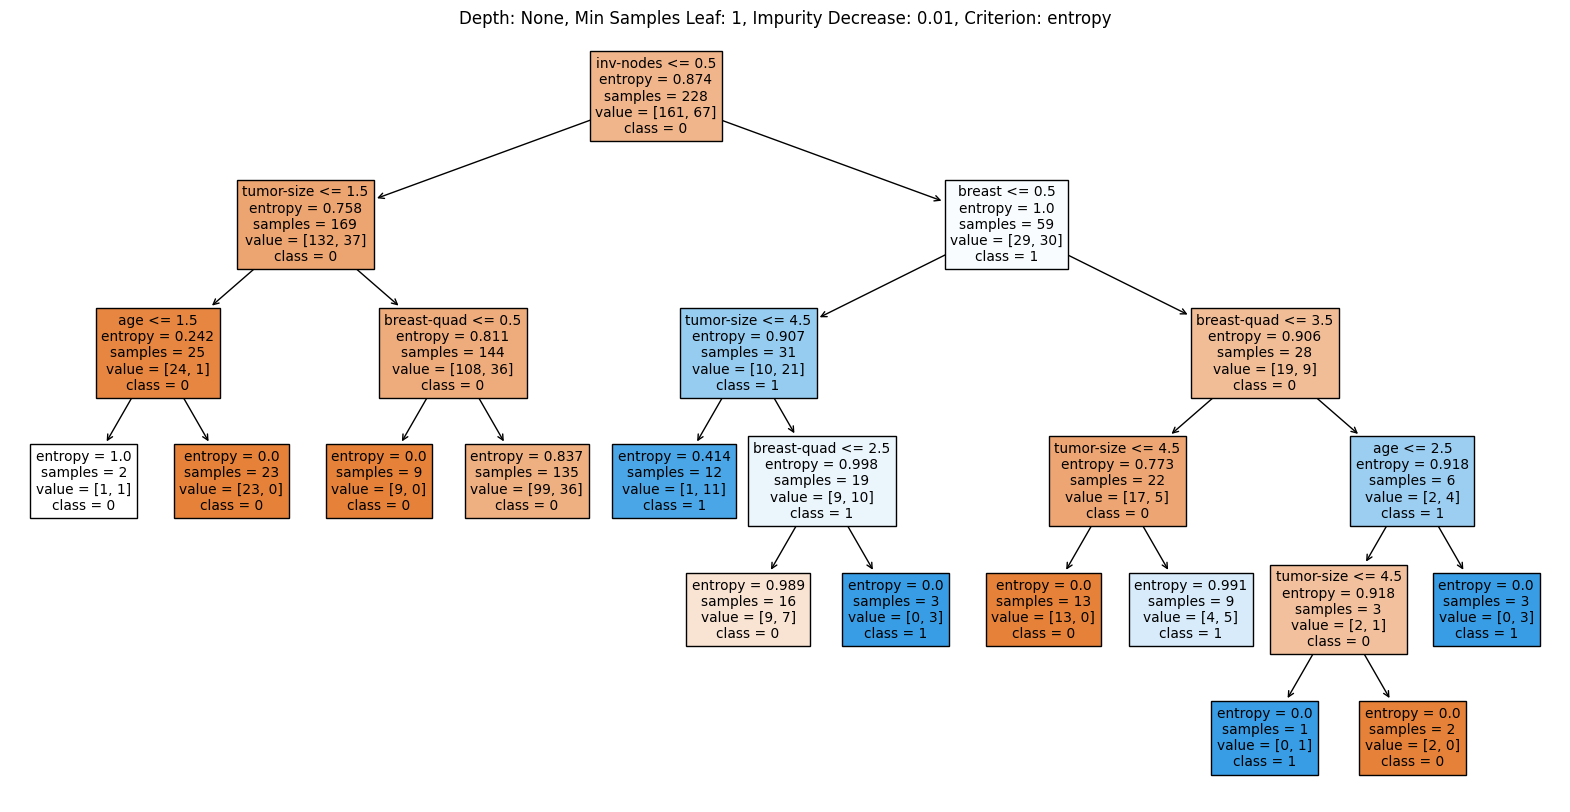

In [71]:
# Configuration 3: Higher minimal impurity decrease
train_and_plot(min_impurity_decrease=0.01, criterion='entropy')

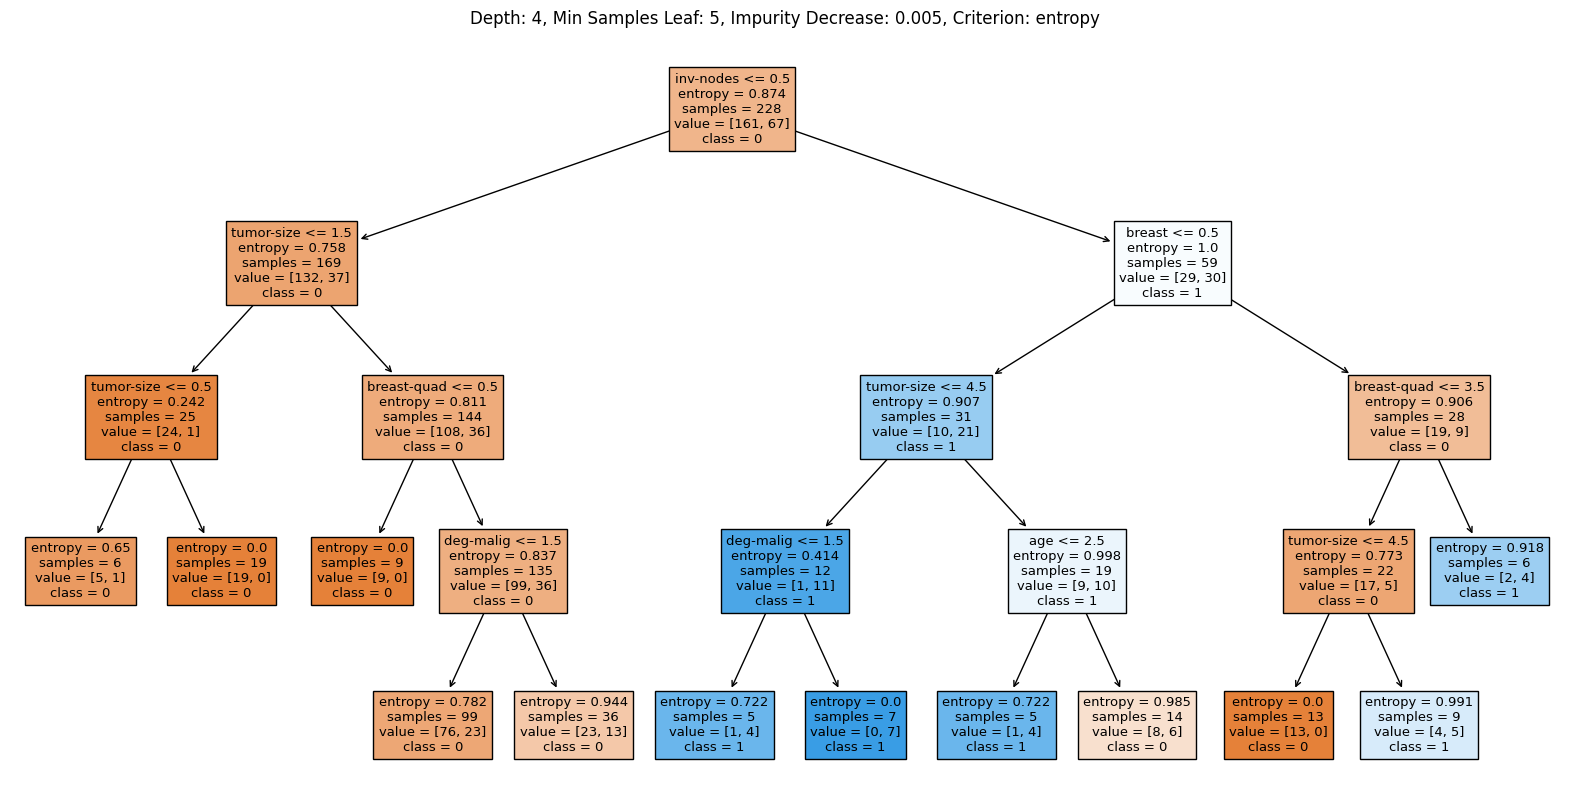

In [72]:
#Config 4
train_and_plot(max_depth=4, min_samples_leaf=5, min_impurity_decrease=0.005, criterion='entropy')

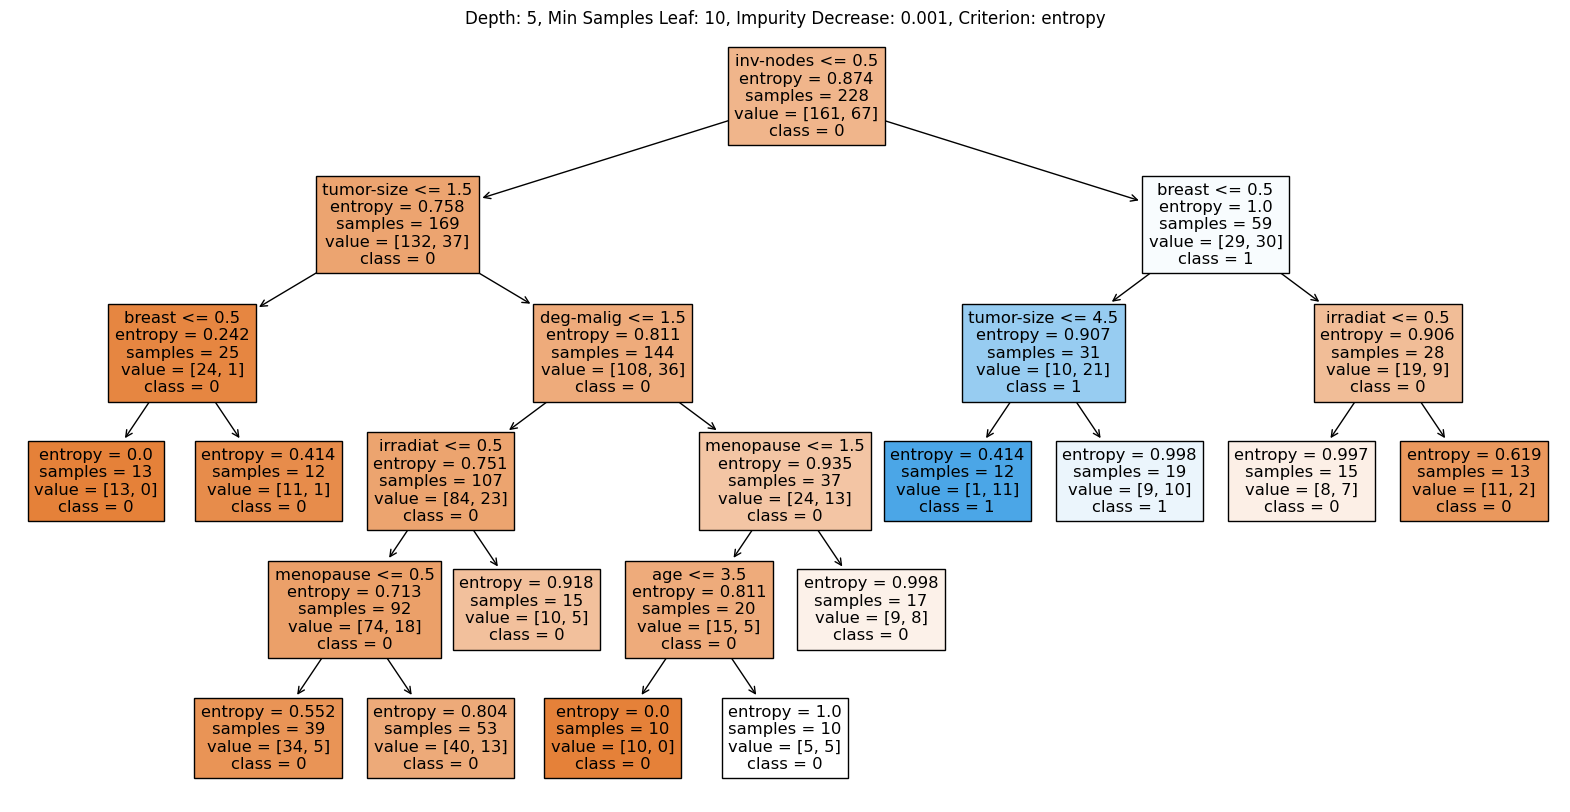

In [74]:
#Config 5
train_and_plot(max_depth=5, min_samples_leaf=10, min_impurity_decrease=0.001, criterion='entropy')

## DOMANDA 2

#   Exercise 1-2

In [ ]:
# LOAD ALL LIBRARIES

## Read file excel 

Load the file into the Disk on the left in the File Section (Folder Icon). Next, read the file using pandas by passing the path.

In a Jupyter Notebook cell, you can print a subset of the representation by simply calling the name of the variable containing the DataFrame.

In [ ]:
# print dataset


Remove duplicated elements

## Select Label and apply encoding

Separate the dataset into features, referred to as X, and labels, referred to as y.


Afterwards, utilize Label Encoder to encode the categorical features.

##  Use the decision tree classifier model.

[Use DecisionTreeClassifier() and its .fit function]

In [ ]:
# Initialize the Decision Tree Classifier, set criterion and max depth

# Train the Decision Tree Classifier


Obiettivo: Controllare la complessità del modello (profondità) e vedere l’accuratezza complessiva sul set di addestramento.

##  Print the structure of the decision tree

In [ ]:
# Define figure

# Print Tree

# use plot_tree from sklearn


In [ ]:
# Decision tree depth


## Impact Parameters

Evaluate the Tree by combining differen max depth and min impurity values

In [ ]:
# Hint: use two nested loops

# Exercise 3-4

## Validation of a classification model using Cross Validation

Cross-validation is a technique used to assess the performance and generalization ability of machine learning models, particularly in the context of classification tasks. It involves partitioning the dataset into multiple subsets, known as folds.

1. **Partitioning the Dataset**: The dataset is divided into k equal-sized folds.

2. **Training and Testing**: The model is trained k times, each time using k-1 folds for training and the remaining fold for testing.

3. **Evaluation**: The performance of the model is evaluated on each fold, and the results are averaged to obtain a robust estimate of the model's performance.

4. **Advantages**: Cross-validation provides a more reliable estimate of the model's performance compared to a single train-test split. It helps to detect overfitting and assesses the model's ability to generalize to unseen data.

[Use `cross_val_score` and `cross_val_predict` to perform cross-validation easily. Follow the same instruction of Exercise 1 to initialise and use the model]

In [ ]:
# Initialize the decision tree classifier

# Perform cross-validation predictions

# Confusion matrix

# Evaluate accuracy

In [ ]:
# Initialize the KNN classifier

# Perform StandardScaler

# Perform cross-validation predictions

# Confusion matrix

# Evaluate accuracy

In [ ]:
# Initialize the Naive Bayes classifier

# Perform cross-validation predictions

# Confusion matrix

# Evaluate accuracy

# Exercise 5

In [ ]:
# Perform Correlation Analysis
